Análisis Exploratorio de Datos(EDA) al dataset Zone_taxis.dbf

Importación de librerias a utilizar

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno 
import warnings
from dbfread import DBF


Ignorar salidas con mensajes warnings

In [2]:
# Ignorar warnings
warnings.filterwarnings("ignore")

Se procede a la ingesta del dataset,conversio y lectura del mismo.

In [3]:
# Ruta al archivo .dbf
file_path = r'C:\Users\walter\Desktop\Proyecto-NYC-Taxis\Data\taxi_zones.dbf'

# Leer el archivo .dbf
table = DBF(file_path)

# Convertir la tabla a un DataFrame
df = pd.DataFrame(iter(table))

# Mostrar las primeras y ultimas filas del DataFrame
print(df.head())
print(df.tail())

   OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough  
0            EWR  
1         Queens  
2          Bronx  
3      Manhattan  
4  Staten Island  
     OBJECTID  Shape_Leng  Shape_Area                zone  LocationID  \
258       259    0.126750    0.000395  Woodlawn/Wakefield         259   
259       260    0.133514    0.000422            Woodside         260   
260       261    0.027120    0.000034  World Trade Center         261   
261       262    0.049064    0.000122      Yorkville East         262   
262       263    0.037017    0.000066      Yorkville West       

In [4]:

# Cantidad de filas y columnas
print("Cantidad de filas y columnas:", df.shape)

# Mostrar la cantidad de filas
print("Cantidad de filas:", df.shape[0])

# Mostrar la cantidad de columnas
print("Cantidad de columnas:", df.shape[1])

Cantidad de filas y columnas: (263, 6)
Cantidad de filas: 263
Cantidad de columnas: 6


IDENTIFICACIÓN DE VALORES NULOS Y/O FALTANTES 

In [5]:
# Valores nulos por columna
null_values = df.isnull().sum()
print(null_values)

OBJECTID      0
Shape_Leng    0
Shape_Area    0
zone          0
LocationID    0
borough       0
dtype: int64


In [6]:
# Valores nulos por filas
rows_with_nulls = df[df.isnull().any(axis=1)]
print(rows_with_nulls)

Empty DataFrame
Columns: [OBJECTID, Shape_Leng, Shape_Area, zone, LocationID, borough]
Index: []


Gráfico de barras de verificación de valores nulos

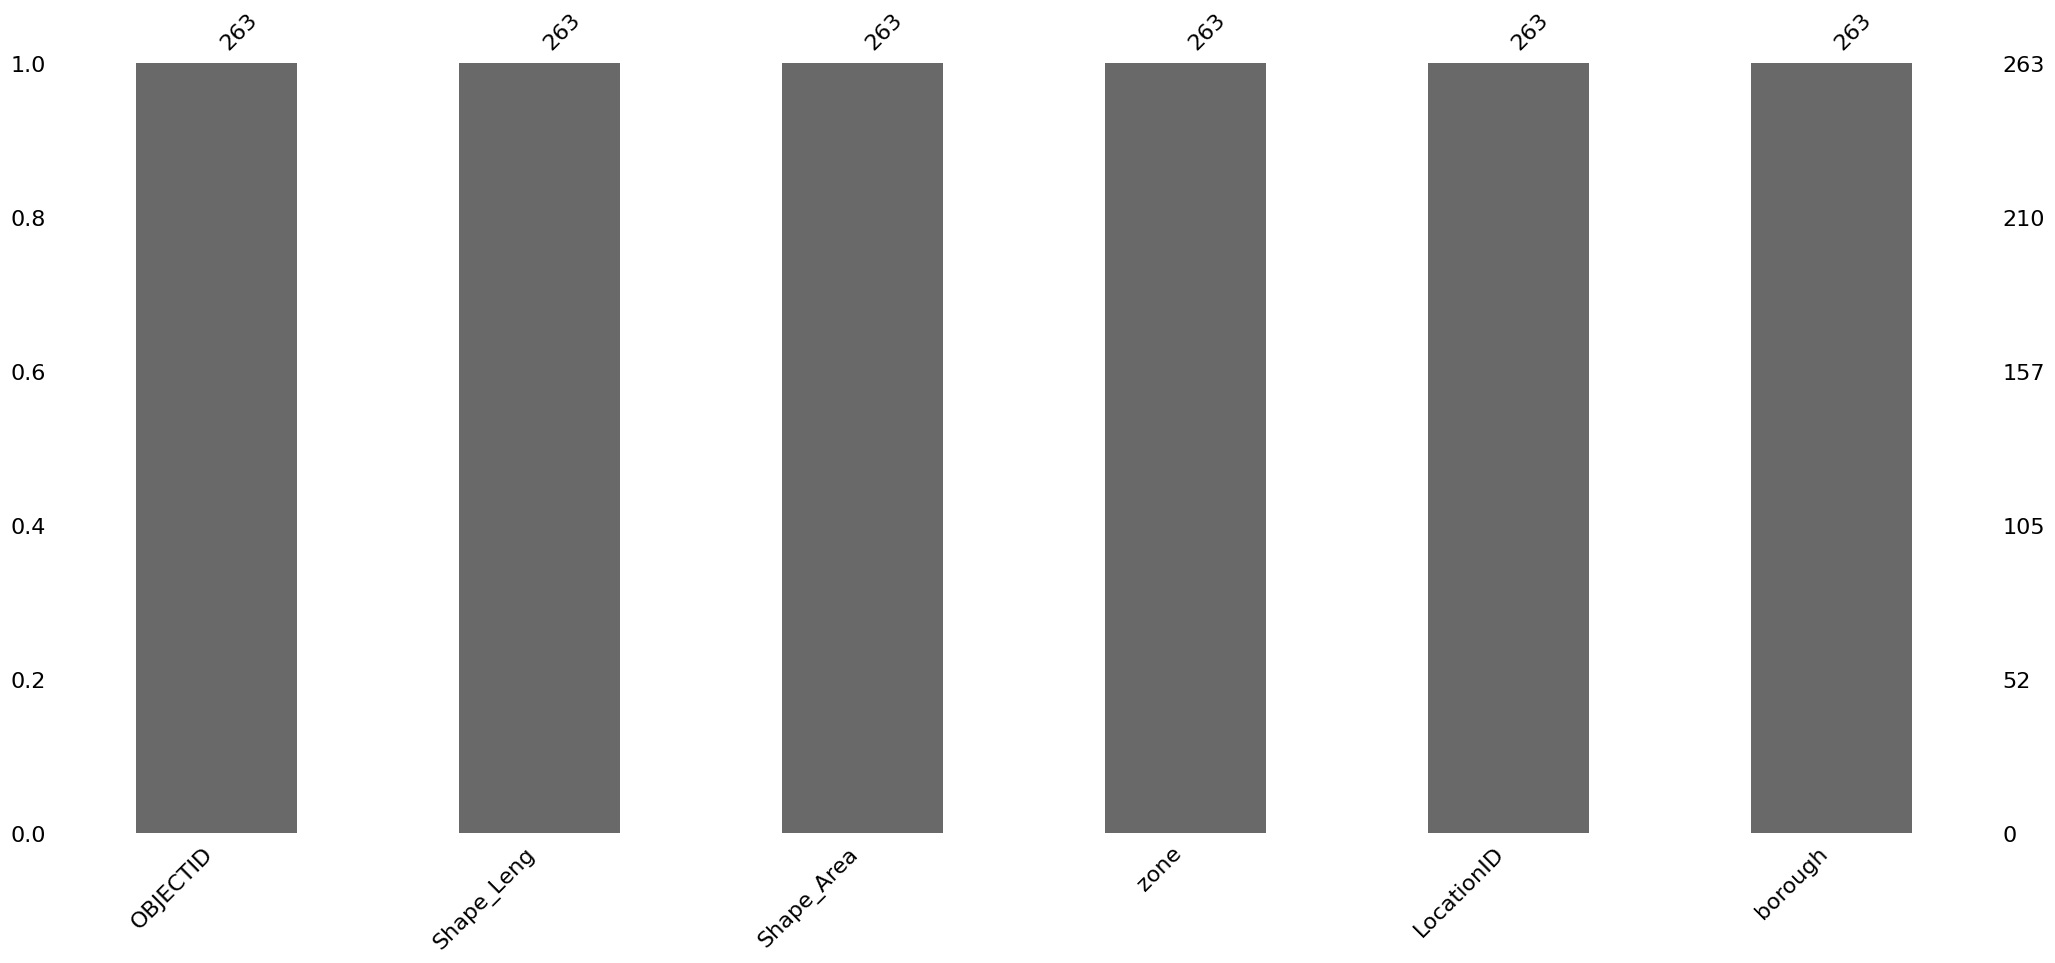

In [7]:
# Visualización
msno.bar(df)
plt.show()


Identificar valores duplicados

In [8]:
# Filas duplicadas
duplicated_rows = df.duplicated()
print("Filas duplicadas:")
print(duplicated_rows)

# Contar el número total de filas duplicadas
num_duplicated_rows = duplicated_rows.sum()
print(f"Total de filas duplicadas: {num_duplicated_rows}")

Filas duplicadas:
0      False
1      False
2      False
3      False
4      False
       ...  
258    False
259    False
260    False
261    False
262    False
Length: 263, dtype: bool
Total de filas duplicadas: 0


IDENTIFICACIÓN DE OUTLIERS MEDIANTE MÉTODO INTERCUARTÍLICO

In [9]:
# Identificar columnas numéricas
numeric_columns = df.select_dtypes(include=['number']).columns

for column in numeric_columns:
    # Calcular el IQR
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

 # Identificar outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]

    print(f"Outliers in column {column}:")
    print(outliers)

Outliers in column OBJECTID:
Empty DataFrame
Columns: [OBJECTID, Shape_Leng, Shape_Area, zone, LocationID, borough]
Index: []
Outliers in column Shape_Leng:
     OBJECTID  Shape_Leng  Shape_Area                               zone  \
1           2    0.433470    0.004866                        Jamaica Bay   
22         23    0.290556    0.002196            Bloomfield/Emerson Hill   
43         44    0.235689    0.001945             Charleston/Tottenville   
75         76    0.241203    0.001267                      East New York   
83         84    0.233624    0.002074  Eltingville/Annadale/Prince's Bay   
117       118    0.243966    0.001827        Heartland Village/Todt Hill   
131       132    0.245479    0.002038                        JFK Airport   
153       154    0.227332    0.001790    Marine Park/Floyd Bennett Field   
183       184    0.260816    0.001989                    Pelham Bay Park   

     LocationID        borough  
1             2         Queens  
22           23 

GRÁFICO QUE RESPALDA  LA TÉCNICA

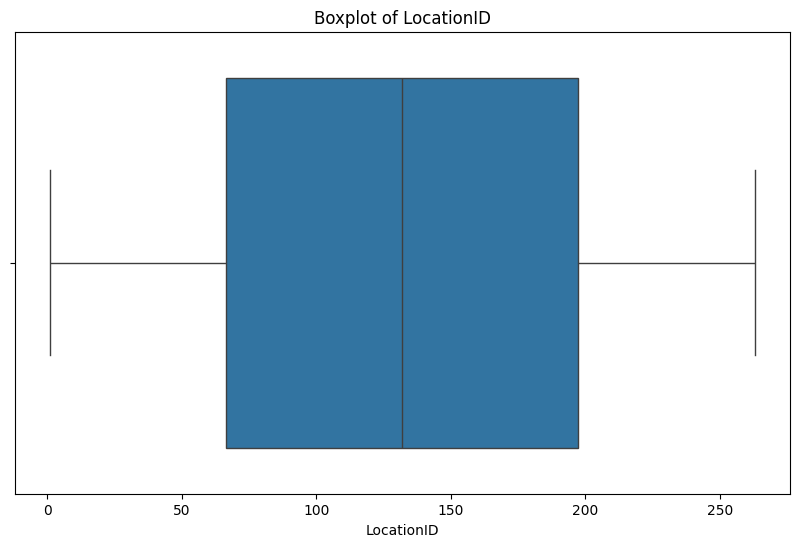

In [10]:
# Visualizar outliers con un boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=df[column])
plt.title(f'Boxplot of {column}')
plt.show()

CANTIDAD DE COLUMNAS % EN VARIABLES NUM & CAT.

In [11]:
# Identificar columnas numéricas y categóricas
numeric_columns = df.select_dtypes(include=['number']).columns
categorical_columns = df.select_dtypes(include=['object', 'category']).columns

# Obtener la cantidad de columnas numéricas y categóricas
num_numeric_columns = len(numeric_columns)
num_categorical_columns = len(categorical_columns)

print(f"Cantidad de columnas numéricas: {num_numeric_columns}")
print(f"Cantidad de columnas categóricas: {num_categorical_columns}")

Cantidad de columnas numéricas: 4
Cantidad de columnas categóricas: 2


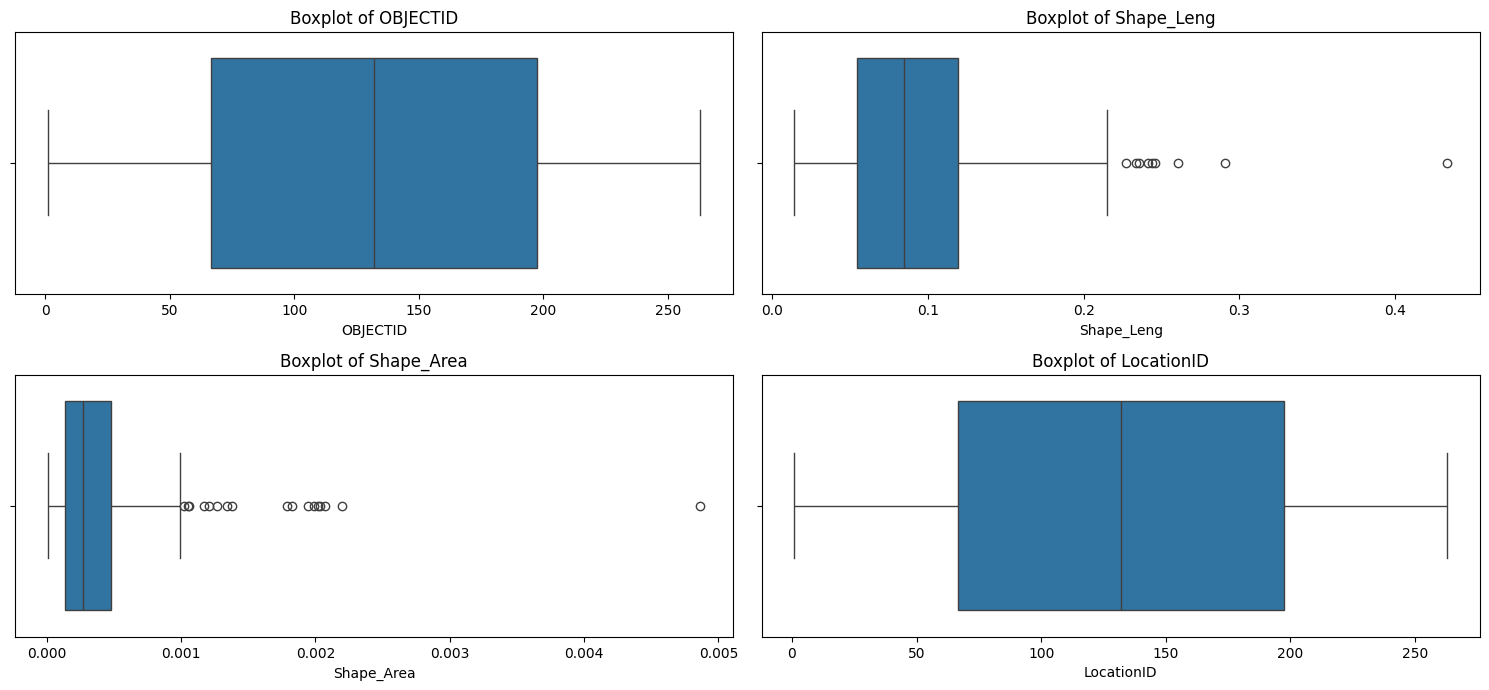

In [12]:
 #Crear boxplots para columnas numéricas
numeric_columns = df.select_dtypes(include=['number']).columns

plt.figure(figsize=(15, 10))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(len(numeric_columns) // 2 + 1, 2, i)
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()

ESTADÍSTICA DESCRIPTIVA DE LAS COLUMNAS NUMÉRICAS

In [13]:
df.describe()

,OBJECTID,Shape_Leng,Shape_Area,LocationID
count,263.000000,263.000000,263.000000,263.000000
mean,132.000000,0.094269,0.000402,131.984791
std,76.065761,0.054594,0.000482,76.073787
min,1.000000,0.014306,0.000006,1.000000
25%,66.500000,0.054722,0.000133,66.500000
50%,132.000000,0.084341,0.000268,132.000000
75%,197.500000,0.119488,0.000480,197.500000
max,263.000000,0.433470,0.004866,263.000000


Correlación de variables categóricas

In [19]:
# Identificar variables categóricas
categorical_columns = df.select_dtypes(include=['object', 'category']).columns
print("Variables categóricas:", categorical_columns)

Variables categóricas: Index(['zone', 'borough'], dtype='object')


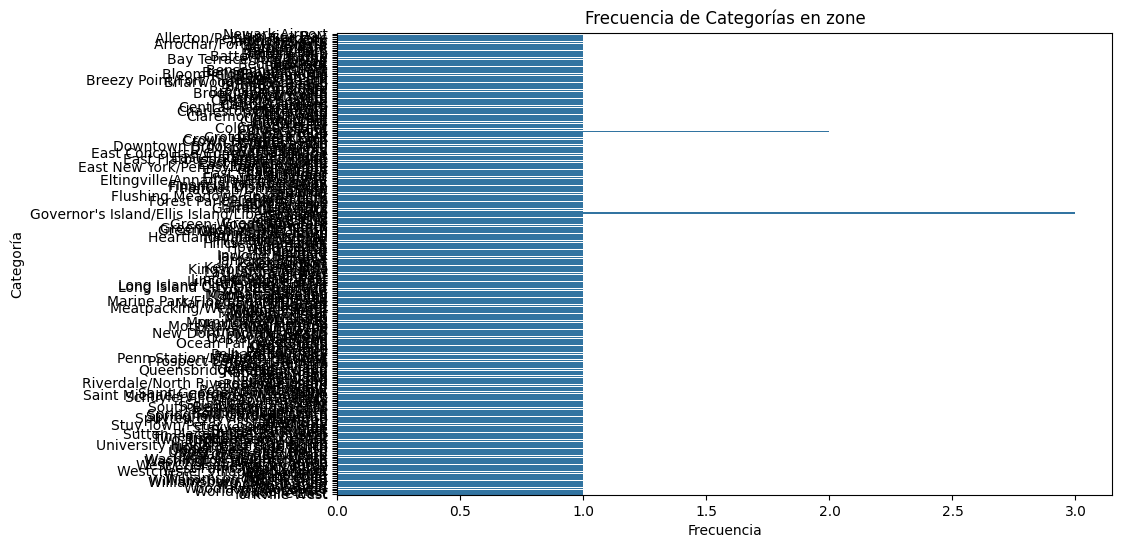

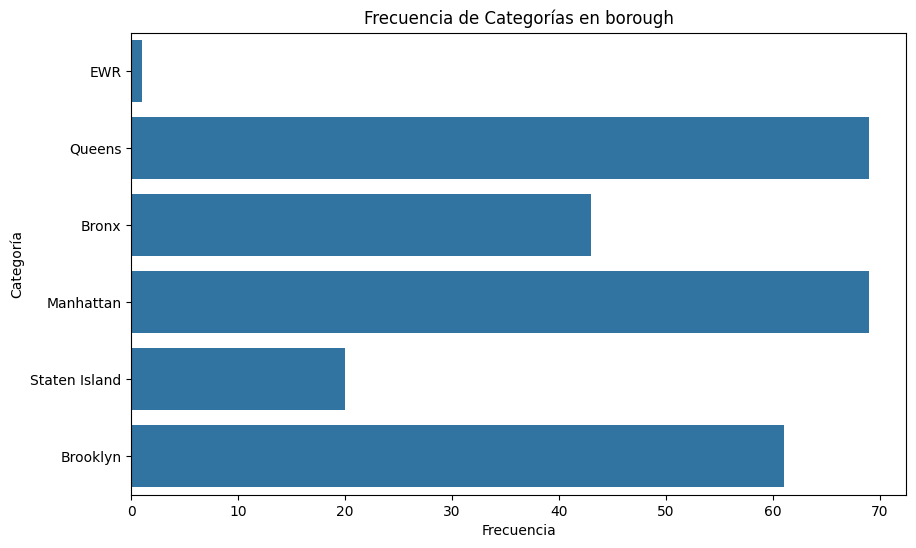

In [20]:
# Visualizar frecuencias con gráficos de barras y pastel
for column in categorical_columns:
    # Gráfico de barras
    plt.figure(figsize=(10, 6))
    sns.countplot(y=column, data=df)
    plt.title(f'Frecuencia de Categorías en {column}')
    plt.xlabel('Frecuencia')
    plt.ylabel('Categoría')
    plt.show()

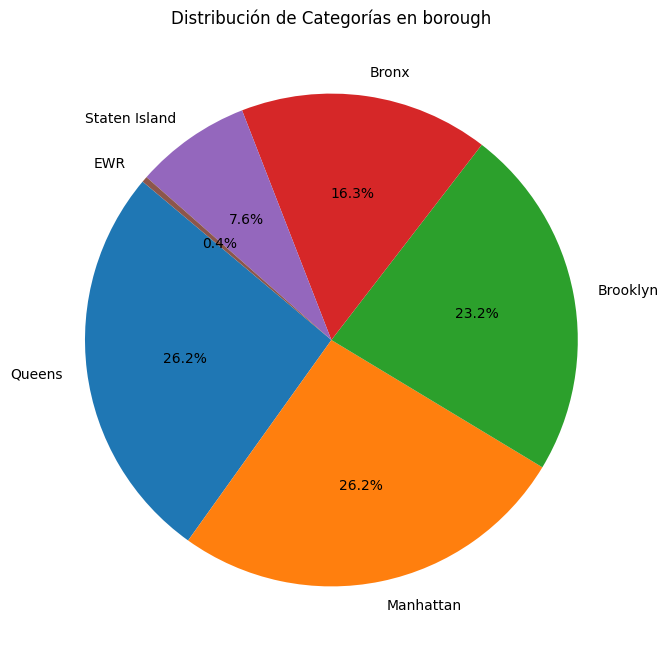

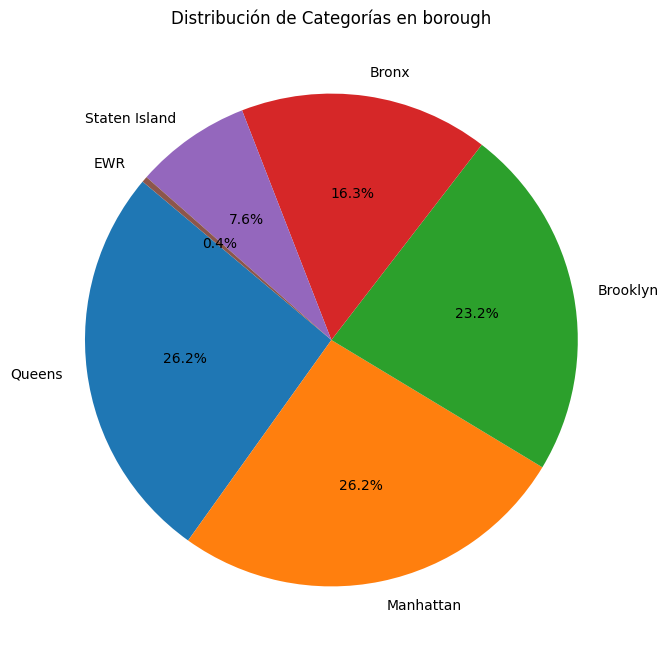

In [22]:
 # Gráfico de pastel
plt.figure(figsize=(8, 8))
category_counts = df[column].value_counts()
category_counts.plot.pie(autopct='%1.1f%%', startangle=140)
plt.title(f'Distribución de Categorías en {column}')
plt.ylabel('')  
plt.show('')

In [27]:
# Calcular y mostrar frecuencias absolutas y relativas
freq_abs = df['zone'].value_counts()
freq_rel = df['zone'].value_counts(normalize=True) * 100
freq_df = pd.DataFrame({
    'Frecuencia Absoluta': freq_abs,
    'Frecuencia Relativa (%)': freq_rel
})

print(f"\nFrecuencias para {column}:")
print(freq_df)
print("\n")



Frecuencias para borough:
                                               Frecuencia Absoluta  \
zone                                                                 
Governor's Island/Ellis Island/Liberty Island                    3   
Corona                                                           2   
Newark Airport                                                   1   
Oakwood                                                          1   
Park Slope                                                       1   
...                                                            ...   
Fordham South                                                    1   
Forest Hills                                                     1   
Forest Park/Highland Park                                        1   
Fort Greene                                                      1   
Yorkville West                                                   1   

                                               Frecuencia Rela

Relación entre las variables numéricas

In [37]:
# Seleccionar solo columnas numéricas
df_numeric = df.select_dtypes(include=[float, int])
correlation_matrix = df_numeric.corr()

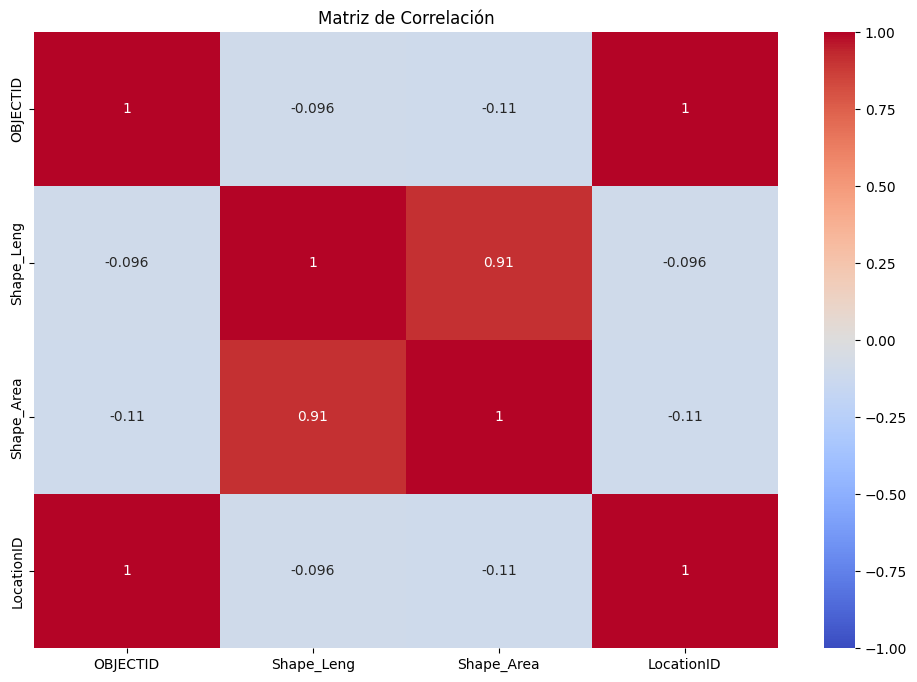

In [38]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de Correlación')
plt.show()

Conclusión:
Este dataset contiene datos para ser utilizados para el objetivo planteado ya que su información de sus variables categóricas se refieren a la distribución de zonas de taxis y la frecuencia del servicio de taxis en diferentes áreas de la ciudad y las variables numéricas hace referencias a los numeros unicos de cada taxis solicitados y de alli se puede calcular duración y costo del viaje,pero se encuentran en valores nulos en cantidad en las columnas ObjectID,Shape_leng y Shape_area.
No seencuentran valores duplicados en las filas analizadas.
Pero hay similitud y/o repeticiones en columnas con el dataset evaluado anteriormente taxi+_zone_lookup.csv.